# Juan Pablo Montenegro Erazo - CC1007778301



# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Leer los datos desde la página web

path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [23]:
# 2. Definir como indice la columna time

serie_tiempo = pd.to_datetime(df.time)
df.index = serie_tiempo
df = df.drop(columns=["Unnamed: 0", "time"])
df

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


In [24]:
# 3. Obtenga información del data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [25]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


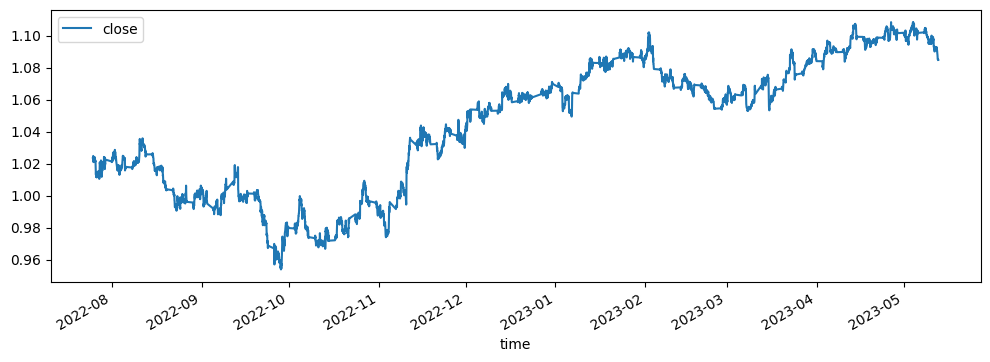

In [26]:
df.plot(y="close", figsize=(12, 4))
plt.show()

In [27]:
# 4.Determine si hay null, nan en el data frame

df.isna().any()

,0
open,False
high,False
low,False
close,False
tick_volume,False
spread,False
real_volume,False
MeanCloseOpen,False
Diff_Close,False
Diff_Open,False


In [28]:
df.isnull().any()

,0
open,False
high,False
low,False
close,False
tick_volume,False
spread,False
real_volume,False
MeanCloseOpen,False
Diff_Close,False
Diff_Open,False


In [29]:
# 5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

def pascal(nombre):

    palabras = nombre.split("_")
    nombre_pascal = ""

    for palabra in palabras:
        nombre_pascal += palabra.capitalize()

    return nombre_pascal


lista_columnas = list(df.columns)

for columna in lista_columnas: # Cambio el nombre de las columnas
    nuevo_nombre_columna = pascal(columna)
    df = df.rename(columns={columna: nuevo_nombre_columna})

df = df.rename_axis("Time") # Cambio el nombre del indice
df

,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
Time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


In [30]:
df2 = pd.DataFrame(df["Close"]) # Nuevo dataframe para trabajar
df2

,Close
Time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [31]:
""" 6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre
cada hora, para ello realizamos lo siguiente:

- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe
tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

- Para la nueva columna construya un histograma de los datos.

- Determine la mejor distribucion estadística que se ajusta al histograma anterior"""

serie_diferencias = df2.diff(1) # Dataframe de diferencias de 1 hora
serie_diferencias = serie_diferencias["Close"] # Serie de diferencias
df2["DiffPrice"] = serie_diferencias
serie_diferencias

,Close
Time,
2022-07-25 13:00:00,NaN
2022-07-25 14:00:00,-0.00046
2022-07-25 15:00:00,0.00158
2022-07-25 16:00:00,0.00028
2022-07-25 17:00:00,-0.00304
...,...
2023-05-12 19:00:00,-0.00038
2023-05-12 20:00:00,0.00032
2023-05-12 21:00:00,-0.00015


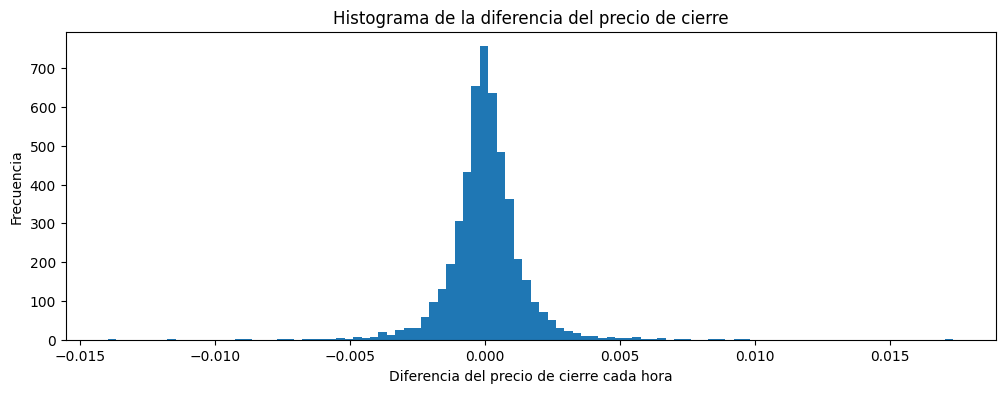

In [32]:
fig, axs = plt.subplots(figsize=(12, 4))

serie_diferencias.plot.hist(ax=axs, bins=100)
axs.set_xlabel("Diferencia del precio de cierre cada hora")
axs.set_ylabel("Frecuencia")
axs.set_title("Histograma de la diferencia del precio de cierre")

plt.show()

In [33]:
!pip install fitter

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,1660.385337,9.954290,36.022262,inf,0.011042,0.571935
genhyperbolic,1821.497871,21.312693,53.897659,inf,0.011745,0.491911
norminvgauss,1938.681101,89.072151,115.140124,inf,0.009911,0.706069
tukeylambda,1981.924322,-5.791199,13.759781,inf,0.019856,0.038305
jf_skew_t,2093.573233,-54.605696,-28.537723,inf,0.012692,0.393090


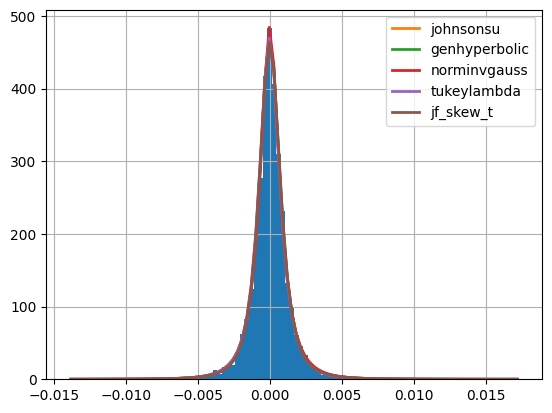

In [34]:
from fitter import Fitter, get_common_distributions, get_distributions

ajustes = Fitter(serie_diferencias[1:], ) # No usamos la primer entrada de la serie_diferencias porque es un NaN
ajustes.fit()
ajustes.summary()

In [35]:
print("La mejor distribucion estadística que se ajusta al histograma anterior es la johnsonsu")

La mejor distribucion estadística que se ajusta al histograma anterior es la johnsonsu


In [36]:
# 7. Para el data frame, seleccionemos solo los datos del 2023.

df_2023 = df2.loc[df2.index.year == 2023]
df_2023

,Close,DiffPrice
Time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


In [37]:
# 8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina
# el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

df2.groupby(pd.Grouper(freq="15D")).mean() # Dataframe de cada 15 dias

,Close,DiffPrice
Time,,
2022-07-25,1.019602,-0.000017
2022-08-09,1.016159,-0.000086
2022-08-24,0.996934,0.000015
2022-09-08,0.999753,-0.000065
2022-09-23,0.976675,-0.000035
2022-10-08,0.976156,0.000049
2022-10-23,0.990803,0.000042
2022-11-07,1.022115,0.000107
2022-11-22,1.041364,0.000086


In [38]:
df2.groupby(pd.Grouper(freq="W")).mean() # Dataframe de cada semana

,Close,DiffPrice
Time,,
2022-07-31,1.018298,-0.000009
2022-08-07,1.020890,-0.000038
2022-08-14,1.025295,0.000065
2022-08-21,1.015174,-0.000181
2022-08-28,0.997196,-0.000065
2022-09-04,0.999479,-0.000009
2022-09-11,0.996315,0.000079
2022-09-18,1.003355,-0.000026
2022-09-25,0.990617,-0.000272


In [39]:
df2.groupby(pd.Grouper(freq="M")).mean() # Dataframe de cada mes

,Close,DiffPrice
Time,,
2022-07-31,1.018298,-0.000009
2022-08-31,1.012731,-0.000031
2022-09-30,0.990365,-0.000048
2022-10-31,0.983698,0.000016
2022-11-30,1.019872,0.000099
2022-12-31,1.058478,0.000059
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049


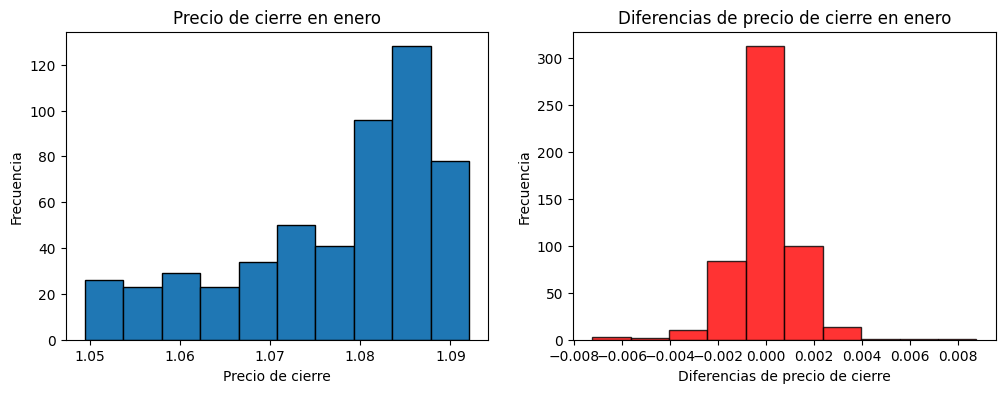

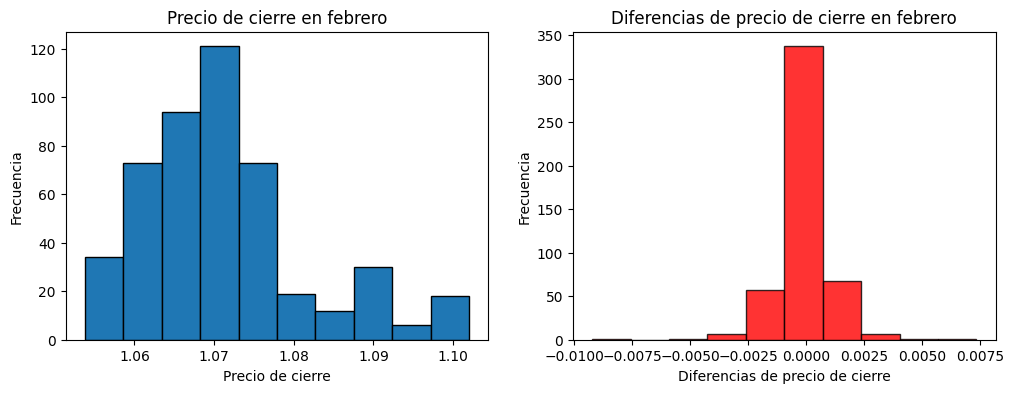

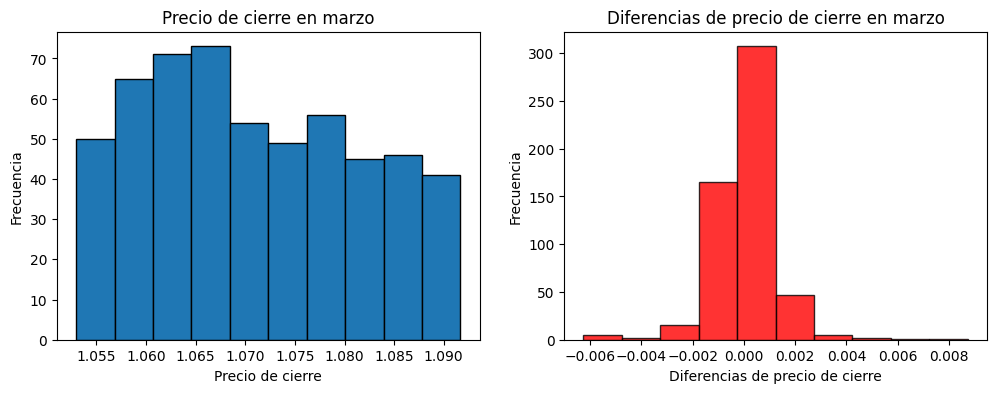

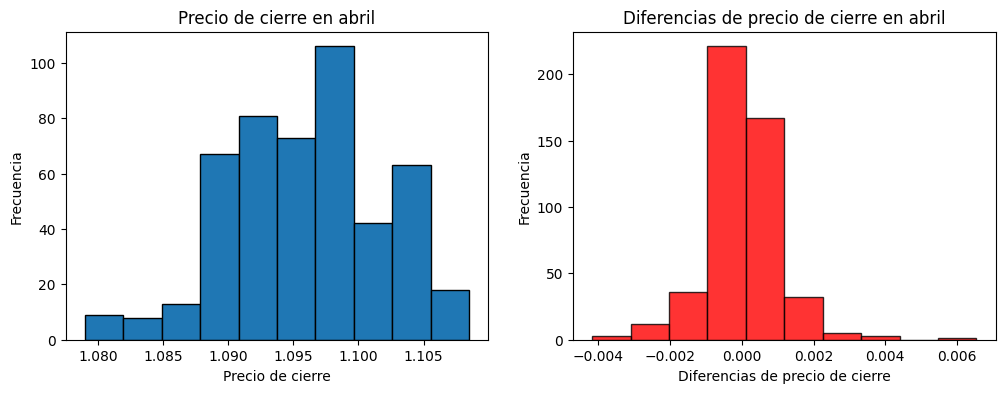

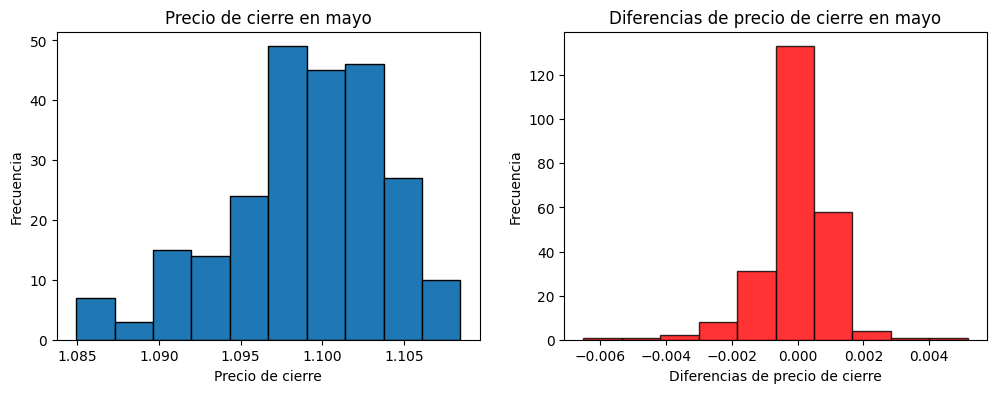

In [41]:
"""9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el
metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre
dicho objeto"""

df_mes = df_2023.groupby(pd.Grouper(freq="M"))

meses = ["enero", "febrero", "marzo", "abril", "mayo"]
contador = 0

for nombre, mes in df_mes:

    fig, axs = plt.subplots(figsize=(12, 4), ncols = 2)

    mes["Close"].plot.hist(ax=axs[0], edgecolor='black')
    mes["DiffPrice"].plot.hist(ax=axs[1], edgecolor='black', color="red", alpha=0.8)

    axs[0].set_xlabel("Precio de cierre")
    axs[0].set_ylabel("Frecuencia")

    axs[1].set_xlabel("Diferencias de precio de cierre")
    axs[1].set_ylabel("Frecuencia")

    axs[0].set_title(f"Precio de cierre en {meses[contador]}")
    axs[1].set_title(f"Diferencias de precio de cierre en {meses[contador]}")

    contador = contador + 1

    plt.show()

